In [2]:
import matplotlib


In [3]:
import pandas as pd

In [4]:
#  # User inputs
# fname = r"C:\Users\satwi\Downloads\archive\fobhav.csv"
# tail_len = 15

# # The two steps in the description
# n_rows = 1000000000000000000000000000000000000
# df = pd.read_csv(fname, skiprows=range(1, n_rows - tail_len))

In [10]:
option_df=pd.read_csv("/kaggle/input/nseindia-futures-options-daily/fobhav.csv", nrows=1000000)
option_df.reset_index()
option_df.head()

,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,TIMESTAMP,Unnamed: 15
0,FUTIDX,BANKNIFTY,24-Sep-2020,0.0,XX,24900.05,25270.00,23371.00,23743.00,23743.00,504222,3051593.27,1432850,-54500,31-AUG-2020,NaN
1,FUTIDX,BANKNIFTY,29-Oct-2020,0.0,XX,24937.55,25315.90,23391.90,23770.10,23770.10,10630,64526.57,91375,19325,31-AUG-2020,NaN
2,FUTIDX,BANKNIFTY,26-Nov-2020,0.0,XX,24989.95,25280.75,23437.15,23766.20,23766.20,1171,7088.68,14400,8400,31-AUG-2020,NaN
3,FUTIDX,NIFTY,24-Sep-2020,0.0,XX,11764.90,11794.45,11350.50,11401.95,11401.95,314090,2722114.47,11209650,-1007775,31-AUG-2020,NaN
4,FUTIDX,NIFTY,29-Oct-2020,0.0,XX,11765.60,11804.30,11368.00,11430.50,11430.50,8666,75149.14,536250,47925,31-AUG-2020,NaN


In [11]:
option_df_small=option_df[100000:]
'''option_df_small=option_df_small.loc[(option_df_small['HIGH']!=option_df_small['LOW'])]
#option_df_small=option_df_small[option_df_small[TIMESTAMP] ]
option_df_small=option_df_small.iloc[::20400]
option_df_small.head()'''

"option_df_small=option_df_small.loc[(option_df_small['HIGH']!=option_df_small['LOW'])]\n#option_df_small=option_df_small[option_df_small[TIMESTAMP] ]\noption_df_small=option_df_small.iloc[::20400]\noption_df_small.head()"

In [12]:
green_df = option_df_small[option_df_small.CLOSE>option_df_small.OPEN].copy()
green_df["Height"]=green_df["CLOSE"]-green_df["OPEN"]
green_df = option_df_small[option_df_small.CLOSE<option_df_small.OPEN].copy()
green_df["Height"]=green_df["OPEN"]-green_df["CLOSE"]

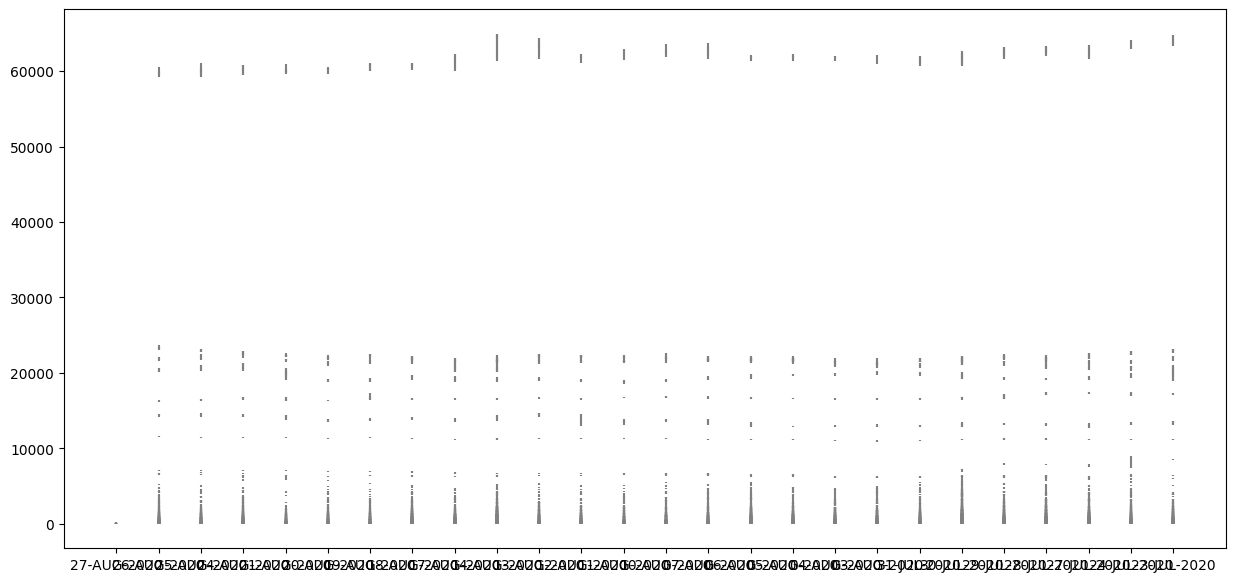

In [13]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,7))
plt.vlines(x=option_df_small["TIMESTAMP"],ymin=option_df_small["LOW"],ymax=option_df_small["HIGH"],color="grey")


In [14]:
option_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   INSTRUMENT   1000000 non-null  object 
 1   SYMBOL       1000000 non-null  object 
 2   EXPIRY_DT    1000000 non-null  object 
 3   STRIKE_PR    1000000 non-null  float64
 4   OPTION_TYP   1000000 non-null  object 
 5   OPEN         1000000 non-null  float64
 6   HIGH         1000000 non-null  float64
 7   LOW          1000000 non-null  float64
 8   CLOSE        1000000 non-null  float64
 9   SETTLE_PR    1000000 non-null  float64
 10  CONTRACTS    1000000 non-null  int64  
 11  VAL_INLAKH   1000000 non-null  float64
 12  OPEN_INT     1000000 non-null  int64  
 13  CHG_IN_OI    1000000 non-null  int64  
 14  TIMESTAMP    1000000 non-null  object 
 15  Unnamed: 15  0 non-null        float64
dtypes: float64(8), int64(3), object(5)
memory usage: 122.1+ MB


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,RocCurveDisplay,auc,precision_recall_curve,precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

/kaggle/input/nseindia-futures-options-daily/fobhav.csv


In [20]:
df=pd.read_csv("/kaggle/input/nseindia-futures-options-daily/fobhav.csv", nrows=100000)

In [21]:
df.isnull().sum()

INSTRUMENT          0
SYMBOL              0
EXPIRY_DT           0
STRIKE_PR           0
OPTION_TYP          0
OPEN                0
HIGH                0
LOW                 0
CLOSE               0
SETTLE_PR           0
CONTRACTS           0
VAL_INLAKH          0
OPEN_INT            0
CHG_IN_OI           0
TIMESTAMP           0
Unnamed: 15    100000
dtype: int64

In [22]:
df.describe()

,STRIKE_PR,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,Unnamed: 15
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,0.0
mean,3588.780043,45.044077,48.45730,41.815928,371.122254,603.470977,1.039399e+03,7.254893e+03,1.574224e+05,8.799924e+03,NaN
std,7981.665607,714.239222,722.20658,697.613333,1153.021340,2669.791571,3.200131e+04,2.157552e+05,3.216772e+06,7.162577e+05,NaN
min,0.000000,0.000000,0.00000,0.000000,0.050000,0.050000,0.000000e+00,0.000000e+00,0.000000e+00,-5.922000e+07,NaN
25%,215.000000,0.000000,0.00000,0.000000,12.100000,8.750000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,630.000000,0.000000,0.00000,0.000000,55.225000,58.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,2150.000000,0.000000,0.00000,0.000000,228.750000,299.762500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
max,73500.000000,59958.600000,60411.70000,59639.400000,59954.400000,60208.800000,3.571340e+06,2.162219e+07,4.998000e+08,1.625400e+08,NaN


# compute the corr matrix

corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

In [25]:
le = LabelEncoder()
#df['EXPIRY_DT'] = le.fit_transform(df['EXPIRY_DT'])
#df['STRIKE_PR'] = le.fit_transform(df['STRIKE_PR'])
df['OPEN'] = le.fit_transform(df['OPEN'])
df['CLOSE'] = le.fit_transform(df['CLOSE'])
df['HIGH'] = le.fit_transform(df['HIGH'])
df['LOW'] = le.fit_transform(df['LOW'])
#df['TIMESTAMP'] = le.fit_transform(df['TIMESTAMP'])

INSTRUMENT          0
SYMBOL              0
EXPIRY_DT           0
STRIKE_PR           0
OPTION_TYP          0
OPEN                0
HIGH                0
LOW                 0
CLOSE               0
SETTLE_PR           0
CONTRACTS           0
VAL_INLAKH          0
OPEN_INT            0
CHG_IN_OI           0
TIMESTAMP           0
Unnamed: 15    100000
dtype: int64

In [26]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (100000, 14)
Y Shape (100000,)


In [32]:
import numpy as np
xnum = df.select_dtypes(exclude=['object'])  # Exclude non-numeric columns
from sklearn.model_selection import train_test_split

# Convert the sparse matrix to a dense array
x_dense = np.array(xnum)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_dense, y, test_size=0.2, random_state=0)

print('Number of transactions in X_train:', X_train.shape)
print('Number of transactions in X_test:', X_test.shape)


Number of transactions in X_train: (80000, 11)
Number of transactions in X_test: (20000, 11)


In [34]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(xnum))

In [36]:
X_train,X_test,y_train,y_test = train_test_split(x_dense,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (80000, 11)
Number transations x_test df (20000, 11)
Number transations y_train df (80000,)
Number transations y_test df (20000,)


In [38]:
# SMOTE 

from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 0
Before OverSampling, counts of label 0: 0 



In [54]:
sm = SMOTE(random_state=2)
X_train = X_train[np.logical_not(np.isnan(X_train))].reshape(-1,1)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

ValueError: Found input variables with inconsistent numbers of samples: [800000, 0]

In [49]:
models = []
#models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [ ]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

In [50]:
models

[['Logistic Regression', LogisticRegression(random_state=0)],
 ['SVM', SVC(random_state=0)],
 ['KNeigbors', KNeighborsClassifier()],
 ['GaussianNB', GaussianNB()],
 ['BernoulliNB', BernoulliNB()],
 ['DecisionTree', DecisionTreeClassifier(random_state=0)],
 ['RandomForest', RandomForestClassifier(random_state=0)],
 ['AdaBoostClassifier', AdaBoostClassifier()]]